In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [139]:
df = pd.read_csv('./new_Base_CDM_balanced_V2.csv', sep=';')

# rename the columns
df.rename(columns={'X1': 'cor_sales_in_vol',
          'X2': 'cor_sales_in_val', 'X3': 'CA_mag', 'X4': 'value', 'X5': 'ENSEIGNE',
                   'X6': 'VenteConv', 'X7': 'Feature'}, inplace=True)
# remove the first row
df = df.iloc[1:]

print(df.groupby('Y').size())
df.head()


Y
Displ       12782
No_Displ    13000
dtype: int64


,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [140]:
# write a function that takes a list of features and parses their values into floats
def parse_features(features):
    for feature in features:
        df[feature] = df[feature].str.replace(',', '.').astype(float)
    return df

In [141]:
numerical_features = ["cor_sales_in_vol", "cor_sales_in_val",
                      "CA_mag", "value", "VenteConv"]
categorical_features = ["ENSEIGNE", "Feature"]


In [142]:
nums = parse_features(numerical_features)
df = nums
df.head()

,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2.0,20.20,47400.0,36.0,CORA,72.0,No_Feat
2,No_Displ,2.0,11.90,62000.0,24.0,LECLERC,48.0,No_Feat
3,No_Displ,8.0,29.52,60661.0,60.0,AUCHAN,480.0,No_Feat
4,No_Displ,2.0,16.20,59677.0,19.0,CARREFOUR,38.0,No_Feat
5,No_Displ,5.0,62.10,142602.0,50.0,CORA,250.0,No_Feat


In [143]:
# write a function to look for missing values
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


missing_values_table(df)


Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [144]:
# write function to plot side by side scatter plots of the features
def plot_scatter(df, features):
    for feature in features:
        df.plot.scatter(feature, 'Y', figsize=(5, 5))
        plt.show()

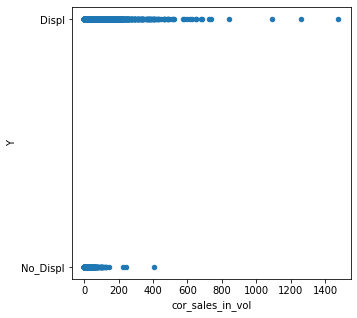

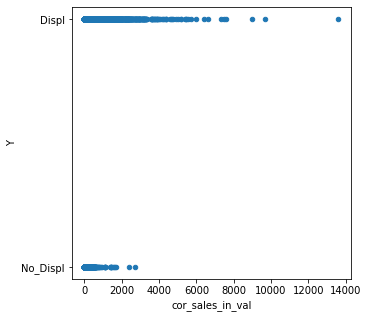

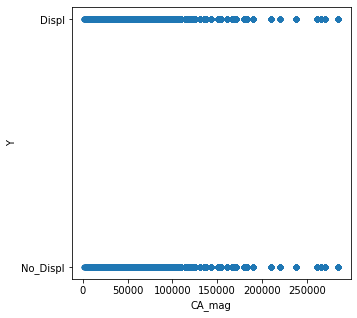

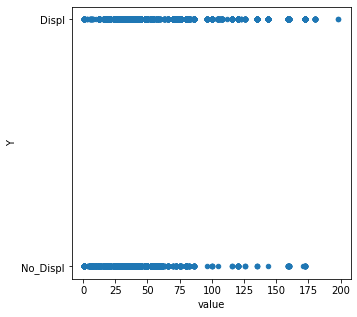

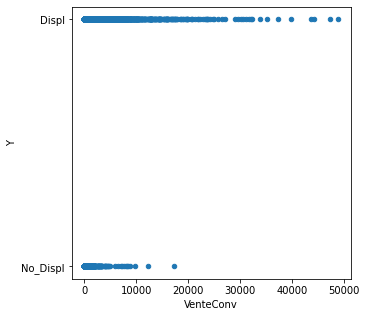

In [145]:
plot_scatter(df, numerical_features)


In [146]:
# write a function that deletes data points outside 3 standart deviations of the mean
def delete_outliers(df, features):
    for feature in features:
        mean = df[feature].mean()
        std = df[feature].std()
        df = df[(df[feature] > mean - 3 * std) & (df[feature] < mean + 3 * std)]
    return df


df = delete_outliers(df, numerical_features)


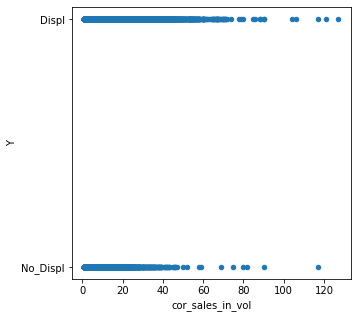

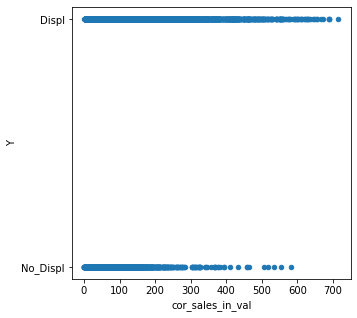

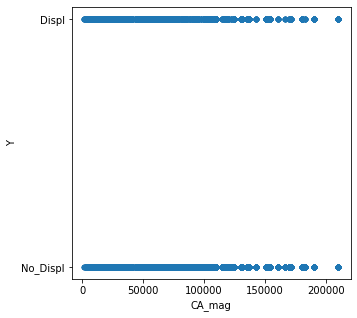

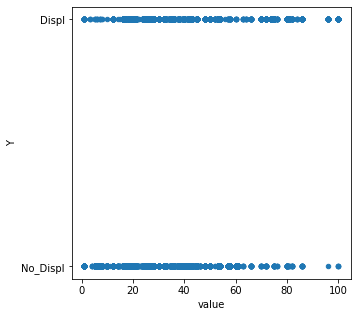

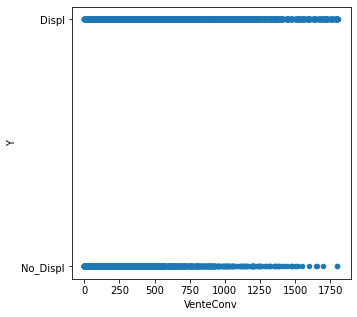

In [147]:
plot_scatter(df, numerical_features)


In [148]:
# write a function that Scale the continuous variables so that they are on the same scale
def scale_features(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
    return df


# scaling the values
df = scale_features(df, numerical_features)


In [149]:
# write a function to label encode the target variable (Y) if its value == 'No_Displ' then 0 else 1
def label_encode(df):
    df['Y'] = np.where(df['Y'] == 'No_Displ', 0, 1)
    return df


label_encode(df)

,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,0,-0.523155,-0.458692,-0.201180,0.146677,CORA,-0.507839,No_Feat
2,0,-0.523155,-0.559977,0.125993,-0.648938,LECLERC,-0.583034,No_Feat
3,0,0.105097,-0.344961,0.095987,1.737906,AUCHAN,0.770479,No_Feat
4,0,-0.523155,-0.507504,0.073937,-0.980444,CARREFOUR,-0.614366,No_Feat
5,0,-0.209029,0.052610,1.932210,1.074894,CORA,0.049859,No_Feat
...,...,...,...,...,...,...,...,...
25778,1,-0.627864,-0.574620,-1.172994,0.411882,CARREFOUR MARKET,-0.608100,No_Feat
25779,1,-0.209029,-0.284801,-1.172994,0.080376,CARREFOUR MARKET,-0.185126,No_Feat
25780,1,0.523932,0.292031,-1.172994,0.080376,CARREFOUR MARKET,0.582491,No_Feat
25781,1,-0.209029,-0.342154,-1.172994,-0.648938,CARREFOUR MARKET,-0.357449,No_Feat


In [150]:
mean_target_by_enseigne = df.groupby('ENSEIGNE')['Y'].mean()
df['ENSEIGNE'] = df['ENSEIGNE'].map(mean_target_by_enseigne)
df.head()


,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,0,-0.523155,-0.458692,-0.201180,0.146677,0.338037,-0.507839,No_Feat
2,0,-0.523155,-0.559977,0.125993,-0.648938,0.405287,-0.583034,No_Feat
3,0,0.105097,-0.344961,0.095987,1.737906,0.321567,0.770479,No_Feat
4,0,-0.523155,-0.507504,0.073937,-0.980444,0.429692,-0.614366,No_Feat
5,0,-0.209029,0.052610,1.932210,1.074894,0.338037,0.049859,No_Feat


In [151]:
# write a function to label encode the target variable (Y) if its value == 'No_Displ' then 0 else 1
def label_encode_Feature(df):
    df['Feature'] = np.where(df['Feature'] == 'No_Feat', 0, 1)
    return df


label_encode_Feature(df)


,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,0,-0.523155,-0.458692,-0.201180,0.146677,0.338037,-0.507839,0
2,0,-0.523155,-0.559977,0.125993,-0.648938,0.405287,-0.583034,0
3,0,0.105097,-0.344961,0.095987,1.737906,0.321567,0.770479,0
4,0,-0.523155,-0.507504,0.073937,-0.980444,0.429692,-0.614366,0
5,0,-0.209029,0.052610,1.932210,1.074894,0.338037,0.049859,0
...,...,...,...,...,...,...,...,...
25778,1,-0.627864,-0.574620,-1.172994,0.411882,0.478940,-0.608100,0
25779,1,-0.209029,-0.284801,-1.172994,0.080376,0.478940,-0.185126,0
25780,1,0.523932,0.292031,-1.172994,0.080376,0.478940,0.582491,0
25781,1,-0.209029,-0.342154,-1.172994,-0.648938,0.478940,-0.357449,0


In [152]:
# TODO : Entropy-based MDLPC: 

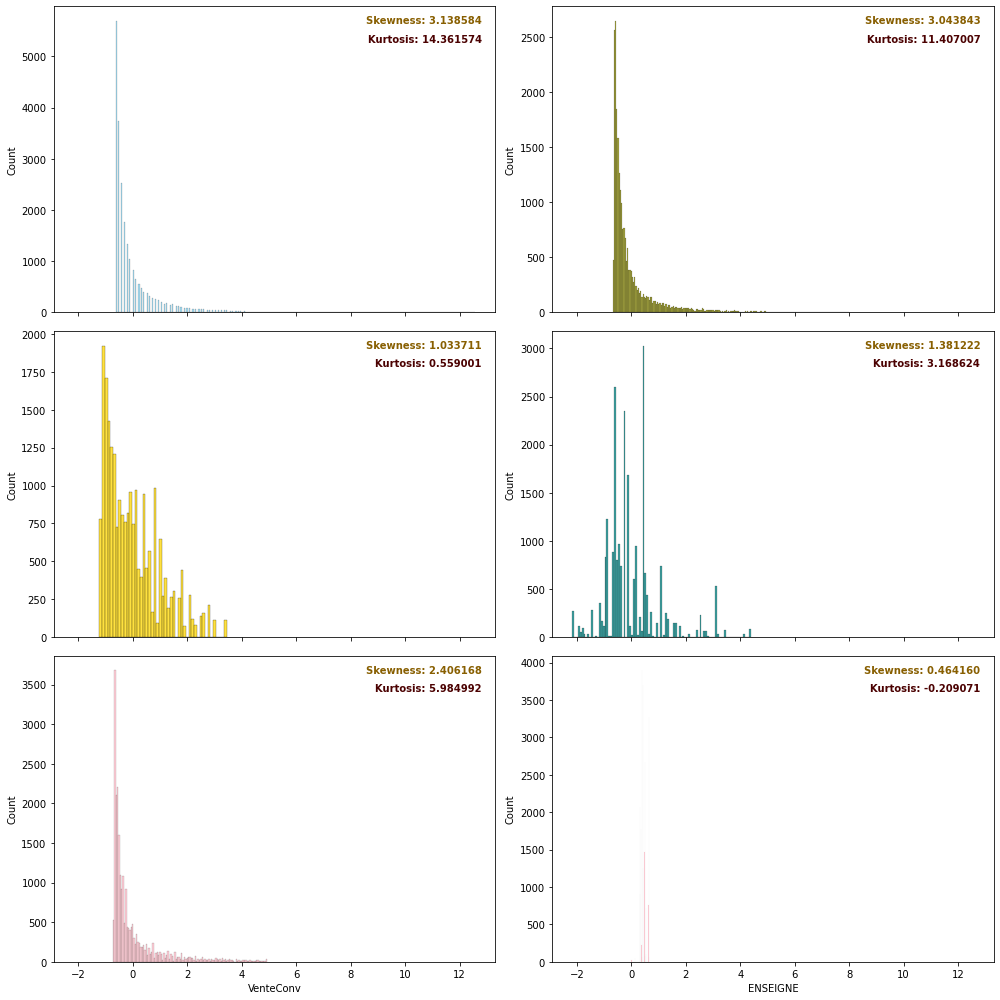

In [154]:
#ploting all numerical values with exploring the skewness
import seaborn as sns

f, axes = plt.subplots(3, 2, figsize=(14, 14), sharex=True)
sns.histplot(df['cor_sales_in_vol'], color="skyblue", ax=axes[0, 0])
sns.histplot(df['cor_sales_in_val'], color="olive", ax=axes[0, 1])
sns.histplot(df['CA_mag'], color="gold", ax=axes[1, 0])
sns.histplot(df['value'], color="teal", ax=axes[1, 1])
sns.histplot(df['VenteConv'], color="pink", ax=axes[2, 0])
sns.histplot(df['ENSEIGNE'], color="pink", ax=axes[2, 1])



num_values = ['cor_sales_in_vol', 'cor_sales_in_val',
              'CA_mag', 'value', 'VenteConv', 'ENSEIGNE']

#print(len(enumerate(axes.reshape(-1))))
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df[num_values[i]].skew(),
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',
            backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df[num_values[i]].kurt(),
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',
            backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()
 

In [155]:
# write function to apply Yeo-Johnson Transformation on numerical features
from sklearn.preprocessing import power_transform

def yeo_johnson_transformation(df, features):
    for feature in features:
        df[feature] = power_transform(df[feature].values.reshape(-1, 1), method='yeo-johnson')
    return df


yeo_johnson_transformation(df, numerical_features)


,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,0,-0.709506,-0.502125,0.046351,0.341574,0.338037,-0.567069,0
2,0,-0.709506,-0.909596,0.417199,-0.640363,0.405287,-0.845462,0
3,0,0.837993,-0.110600,0.386840,1.573952,0.321567,1.369331,0
4,0,-0.709506,-0.691295,0.364106,-1.145545,0.429692,-0.969528,0
5,0,0.262648,0.794141,1.609802,1.128831,0.338037,0.763839,0
...,...,...,...,...,...,...,...,...
25778,1,-1.140365,-0.973359,-1.568929,0.594613,0.478940,-0.944327,0
25779,1,0.262648,0.070234,-1.568929,0.273317,0.478940,0.345314,0
25780,1,1.242386,1.086009,-1.568929,0.273317,0.478940,1.264287,0
25781,1,0.262648,-0.101772,-1.568929,-0.640363,0.478940,-0.087865,0


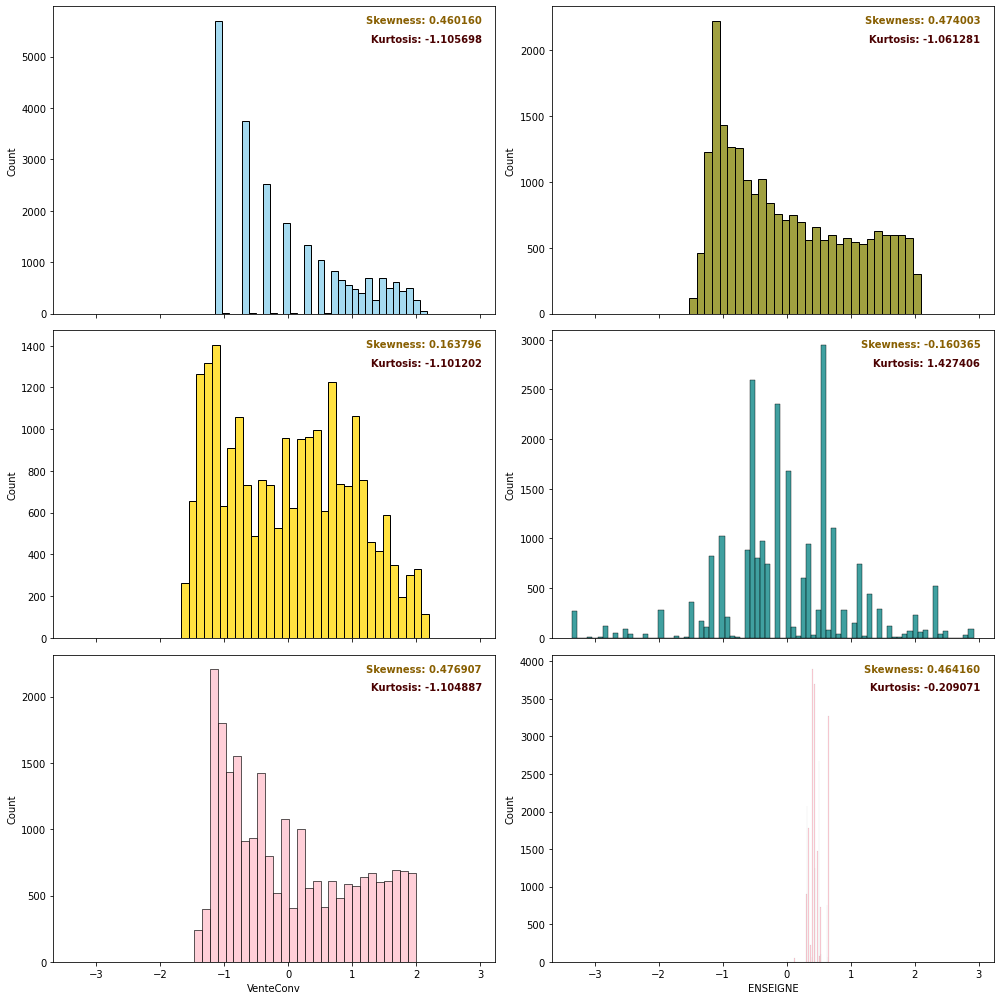

In [156]:
#ploting all numerical values with exploring the skewness
import seaborn as sns

f, axes = plt.subplots(3, 2, figsize=(14, 14), sharex=True)
sns.histplot(df['cor_sales_in_vol'], color="skyblue", ax=axes[0, 0])
sns.histplot(df['cor_sales_in_val'], color="olive", ax=axes[0, 1])
sns.histplot(df['CA_mag'], color="gold", ax=axes[1, 0])
sns.histplot(df['value'], color="teal", ax=axes[1, 1])
sns.histplot(df['VenteConv'], color="pink", ax=axes[2, 0])
sns.histplot(df['ENSEIGNE'], color="pink", ax=axes[2, 1])


num_values = ['cor_sales_in_vol', 'cor_sales_in_val',
              'CA_mag', 'value', 'VenteConv', 'ENSEIGNE']

#print(len(enumerate(axes.reshape(-1))))
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % df[num_values[i]].skew(),
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',
            backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % df[num_values[i]].kurt(),
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',
            backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()


In [158]:
# save df to csv
df.to_csv('normalized_processed.csv', index=False)



In [159]:
df_backup = df.copy()

In [173]:
df_backup.head()

,Y,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,0,19,42,66,74,0.338037,39,0
2,0,19,25,80,54,0.405287,27,0
3,0,88,58,79,98,0.321567,123,0
4,0,19,34,78,44,0.429692,21,0
5,0,62,96,126,90,0.338037,96,0


In [172]:
import numpy as np
import math
# Define the function to calculate the optimal number of intervals


def calculate_optimal_intervals(data):
    n = len(data)
    k_min = 2
    k_max = int(np.sqrt(n))
    k_optimal = k_min
    mdl_min = float("inf")
    
    # preventing log(0)
    data += np.finfo(float).eps

    for k in range(k_min, k_max):
        intervals = np.linspace(data.min(), data.max(), k+1)
        interval_freqs = np.histogram(data, intervals)[0]
        #interval_freqs += np.finfo(float).eps
        # Calculate the MDLPC
        ent = sum(np.array(interval_freqs)/n *
                  np.log2(np.array(interval_freqs)/n + np.finfo(float).eps))
        mdl = ent
        if mdl < mdl_min:
            mdl_min = mdl
            k_optimal = k
    return k_optimal


# Discretize the numerical features using the MDLPC criterion
numerical_features = ["cor_sales_in_vol",
                      "cor_sales_in_val", "CA_mag", "value", "VenteConv"]
for feature in numerical_features:
    n_intervals = calculate_optimal_intervals(df_backup[feature])
    df_backup[feature] = pd.cut(
        df_backup[feature], n_intervals, labels=range(n_intervals))


In [174]:
# save df to csv
df_backup.to_csv('data_after_MDLPC.csv', index=False)


### Trying the models 

- **Logit model**

- **ADL model**

- **Decision tree**

- **Random Forest**

- **Neural network**

- **Gradient Boosting machine**

- **Support Vector Machine**

#### Logit model
The logit model, also known as a logistic regression model, is used for binary classification problems. It estimates the probability of the target variable being a certain class given the independent variables.

In [175]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# load the dataset
df = df_backup

# split the data into the features(X) and the target(Y)
X = df.drop('Y', axis=1)
Y = df['Y']

# split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# instantiate the model
logit = LogisticRegression()

# fit the model on the training data
logit.fit(X_train, Y_train)

# make predictions on the test data
Y_pred = logit.predict(X_test)


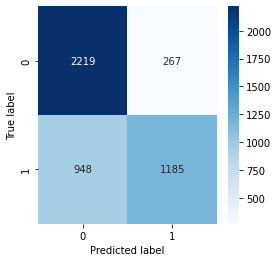

In [181]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(Y_test, Y_pred)


In [180]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return acc, prec, rec, f1


acc, prec, rec, f1 = evaluate_model(Y_test, Y_pred)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.7369560510933102
Precision: 0.8161157024793388
Recall: 0.5555555555555556
F1 Score: 0.6610878661087867


#### ADL model: 
Linear discriminant analysis (LDA) is a method used for classification and dimensionality reduction. It aims to find a linear combination of the independent variables that best separates the different classes of the target variable.

In [186]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [187]:
# instantiate the model
adl = LinearDiscriminantAnalysis()
# fit the model on the training data
adl.fit(X_train, Y_train)
# make predictions on the test data
Y_pred = adl.predict(X_test)


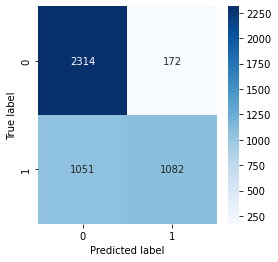

In [190]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(Y_test, Y_pred)


In [191]:
acc, prec, rec, f1 = evaluate_model(Y_test, Y_pred)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.7352240744749946
Precision: 0.8628389154704944
Recall: 0.5072667604313174
F1 Score: 0.6389134927664599


#### Decision tree: 
Decision trees are a type of supervised learning algorithm used for both classification and regression problems. They work by recursively partitioning the data into subsets based on the values of the independent variables.

In [192]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
dt = DecisionTreeClassifier()
# fit the model on the training data
dt.fit(X_train, Y_train)
# make predictions on the test data
Y_pred = dt.predict(X_test)


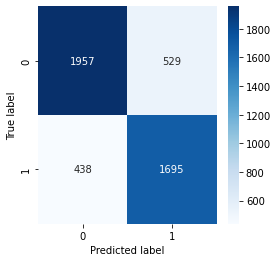

In [193]:
plot_confusion_matrix(Y_test, Y_pred)


In [194]:
acc, prec, rec, f1 = evaluate_model(Y_test, Y_pred)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.7906473262610955
Precision: 0.7621402877697842
Recall: 0.7946554149085795
F1 Score: 0.7780582969933441


##### We will try to fine-tune the DT model to explore better results 

In [195]:
from sklearn.model_selection import GridSearchCV


In [197]:
# Define the parameter grid to search over
param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 4, 6, 8, 10]}
# Instantiate the GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5)
# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [198]:
# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 6}
Best score:  0.7755100360237462


In [200]:
# Re-train the model with the best parameters
dt = DecisionTreeClassifier(max_depth=grid_search.best_params_["max_depth"],
                            min_samples_split=grid_search.best_params_[
                                "min_samples_split"],
                            min_samples_leaf=grid_search.best_params_["min_samples_leaf"])
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)

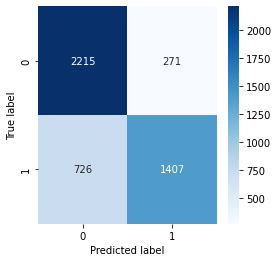

In [201]:
plot_confusion_matrix(Y_test, Y_pred)


In [202]:
acc, prec, rec, f1 = evaluate_model(Y_test, Y_pred)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.7841524139424118
Precision: 0.8384982121573301
Recall: 0.659634317862166
F1 Score: 0.7383888743112044


##### It turns out that we gote worse results when we tried to tune the model, that might be due to several reasons such as : 

- **Overfitting**: The model may be overfitting on the training data and therefore may not generalize well to unseen test data.

- **Insufficient data**: The dataset may be too small to support the complexity of the model, and thus the model is not able to learn the underlying patterns of the data.

- **Poorly chosen parameter grid**: The parameters searched in the grid search may not be the best for the specific dataset and problem.

- **Correlated features**: The features used in the model may be correlated with each other, this could lead to poor generalization as the model would be based on redundant information.

#### Random Forest:
 A random forest is an ensemble of decision trees. The idea is to average the predictions of many trees to reduce the variance and increase the accuracy of the model.

In [203]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
rf = RandomForestClassifier()

# fit the model on the training data
rf.fit(X_train, Y_train)
# make predictions on the test data
Y_pred = rf.predict(X_test)


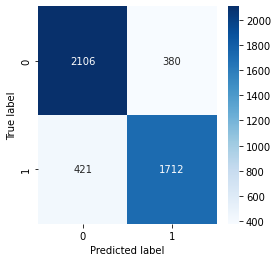

In [204]:
plot_confusion_matrix(Y_test, Y_pred)


In [205]:
acc, prec, rec, f1 = evaluate_model(Y_test, Y_pred)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.8265858410911453
Precision: 0.8183556405353728
Recall: 0.802625410220347
F1 Score: 0.810414201183432


#### Neural network: 
Neural networks are a type of machine learning model that are inspired by the structure and function of the human brain. They can be used for a wide range of problems, including classification and regression.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Create the model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


In [208]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])


In [209]:
# fit the model to the training data
history = model.fit(X_train, Y_train, epochs=10,
                    batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/10
578/578 [==============================] - 3s 4ms/step - loss: 0.6715 - accuracy: 0.6648 - val_loss: 0.5713 - val_accuracy: 0.7140
Epoch 2/10
578/578 [==============================] - 2s 3ms/step - loss: 0.5786 - accuracy: 0.7006 - val_loss: 0.5951 - val_accuracy: 0.6908
Epoch 3/10
578/578 [==============================] - 2s 4ms/step - loss: 0.5669 - accuracy: 0.7129 - val_loss: 0.5585 - val_accuracy: 0.7287
Epoch 4/10
578/578 [==============================] - 2s 3ms/step - loss: 0.5535 - accuracy: 0.7190 - val_loss: 0.5419 - val_accuracy: 0.7276
Epoch 5/10
578/578 [==============================] - 2s 3ms/step - loss: 0.5525 - accuracy: 0.7216 - val_loss: 0.5475 - val_accuracy: 0.7357
Epoch 6/10
578/578 [==============================] - 2s 3ms/step - loss: 0.5442 - accuracy: 0.7236 - val_loss: 0.5477 - val_accuracy: 0.7307
Epoch 7/10
578/578 [==============================] - 2s 3ms/step - loss: 0.5447 - accuracy: 0.7245 - val_loss: 0.5535 - val_accuracy: 0.7164
Epoch 

In [210]:
# evaluate the model's performance on the test data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)


145/145 [==============================] - 0s 3ms/step - loss: 0.5380 - accuracy: 0.7268
Test accuracy: 0.7267807126045227


In [211]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix_nn(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    Y_pred = (Y_pred > 0.5)  # threshold of 0.5 for binary classification
    conf_matrix = confusion_matrix(Y_test, Y_pred)

    plt.imshow(conf_matrix, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0, 1], ["Negative", "Positive"])
    plt.yticks([0, 1], ["Negative", "Positive"])
    plt.colorbar()
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, conf_matrix[i, j],
                     ha="center", va="center", color="w")
    plt.show()


145/145 [==============================] - 1s 3ms/step


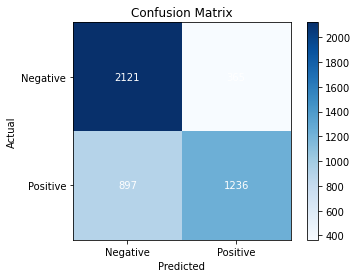

In [213]:
plot_confusion_matrix_nn(model, X_test, Y_test)


In [214]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_model_nn(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    Y_pred = (Y_pred > 0.5)  # threshold of 0.5 for binary classification
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))


In [215]:
evaluate_model_nn(model, X_test, Y_test)


145/145 [==============================] - 0s 2ms/step
Accuracy: 0.73
Precision: 0.77
Recall: 0.58
F1 Score: 0.66


#### Gradient Boosting machine :
 Gradient Boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [234]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = onehot_encoder.fit_transform(X_train)
X_test_encoded = onehot_encoder.transform(X_test)


In [235]:
from xgboost import XGBClassifier

# Create the GBM model
gbm = XGBClassifier()

# Fit the model to the training data
gbm.fit(X_train_encoded, Y_train)

# Make predictions on the test data
Y_pred = gbm.predict(X_test_encoded)


In [236]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_xgboost(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))


In [237]:
evaluate_xgboost(gbm, X_test_encoded, Y_test)


Accuracy: 0.81
Precision: 0.85
Recall: 0.71
F1 Score: 0.77


##### We wanted to test if tuning the model would give better result but we didnt run this step here because it requires expensive processing power 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create the GridSearchCV object
xgb_grid = GridSearchCV(gbm, param_grid, cv=5)

# Fit the GridSearchCV object to the data
xgb_grid.fit(X_train_encoded, Y_train)

# Print the best parameters and the best score
print("Best parameters: ", xgb_grid.best_params_)
print("Best score: ", xgb_grid.best_score_)

best_params = xgb_grid.best_params_
best_score = xgb_grid.best_score_

# Next, re-initialize the model using the best parameters
xgb_best = XGBClassifier(**best_params)

# Re-train the model on the entire training dataset
xgb_best.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = xgb_best.predict(X_test)


In [ ]:
evaluate_xgboost(xgb_best, X_test_encoded, Y_test)


#### Support Vector Machine: 
SVM is a supervised learning algorithm that can be used for classification or regression problems. It works by finding the optimal hyperplane that maximally separates the different classes of the target variable.

In [240]:
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC()

# Fit the SVM model to the training data
svm.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = svm.predict(X_test)


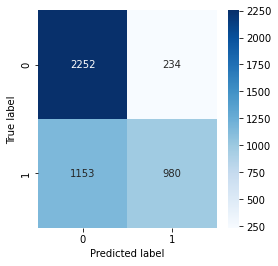

In [242]:
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(Y_test, Y_pred)


In [241]:
acc, prec, rec, f1 = evaluate_model(Y_test, Y_pred)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.6997185537995237
Precision: 0.8072487644151565
Recall: 0.45944678856071264
F1 Score: 0.5855990439199283


In [243]:
### 
#TODO : We already tried doing MDLPC using an entropy based approach
#TODO : We need to try doing MDLPC using a Gini based approach or Chi-squared MDLPC
